# Time coverage calc #

**2016-05-24 (WIC):** Try a simple metric for total time coverage.

In [1]:
# ensure can import the metric
! ls -l ./surveyDurationMetric.py

lrwxr-xr-x  1 clarkson  staff  76 May 24 14:56 ./surveyDurationMetric.py -> /Users/clarkson/Progs/Projects/lsstScratchWIC/python/surveyDurationMetric.py


In [2]:
# The usual incantations
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

In [3]:
# import the new metric
from surveyDurationMetric import PercentileRangeMetric

## Decide on some options ##

In [140]:
dirOut = 'testDuration'
dbName = 'minion_1016_sqlite.db'
#dbName = 'minion_1020_sqlite.db'
#dbName = 'astro_lsst_01_1004_sqlite.db'
tMax = 365.25 * 10.
sFilter = 'i'
nSide = 64

# Standardize the histogram lower limit?
histLoLim = None
histLoLim = 0.

pctile = 100.  # percentile for survey duration

## Set up the metric bundle and run it ##

In [141]:
# construct metric name
sMetricName = 'Total duration'
if abs(pctile % 100.) > 1e-2:
    sMetricName = '%.1fth percentile duration' % (pctile)

In [142]:
opsdb = db.OpsimDatabase(dbName)
resultsDb = db.ResultsDb(outDir=dirOut)

In [143]:
# Describe the metric, the slicer, and the plot dictionary
sql = 'night < %i and filter = "%s"' % (tMax, sFilter) # See How well we do after year 3
slicer = slicers.HealpixSlicer(nside=nSide, useCache=False)
metric = PercentileRangeMetric('expMJD', pctile, metricName=sMetricName)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [144]:
# Try the tutorial example
myBundle = metricBundles.MetricBundle(metric, slicer, sql, runName=dbName.split('sqlite.db')[0])

In [145]:
opsdb = db.OpsimDatabase(dbName)
bgroup = metricBundles.MetricBundleGroup({0: myBundle}, opsdb, outDir='newmetric_test', resultsDb=None)

In [146]:
bgroup.runAll()

Querying database with constraint night < 3652 and filter = "i"
Found 541688 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [147]:
myBundle.setPlotDict({'xMin':histLoLim})

Plotting figures with night < 3652 and filter = "i" sqlconstraint now.
monopole: 2544.91  dipole: lon: 97.4092, lat: -48.0252, amp: 244.771
Plotting complete.


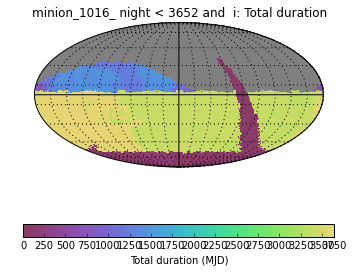

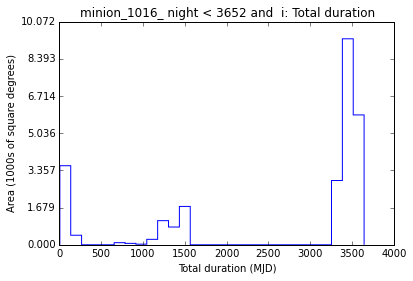

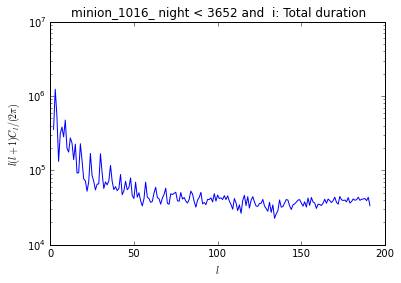

In [148]:
#myBundle.setPlotDict({'colorMin':1.0, 'colorMax':1.8})
bgroup.plotAll(closefigs=False)